## Real Estate Market Analysis with Python Project

**Investigating Property Transactions and Customer Satisfaction**

### Data Cleaning and Preprocessing (Properties Table)

#### Importing the relevant libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import json
import requests

#### Reading the data

In [7]:
prop_df = pd.read_csv('properties.csv',index_col=0)
prop_df

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [8]:
cust_df = pd.read_csv('customers.csv',index_col=0)
cust_df

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


#### Creating new variables that replicates the original data

- Creating a new variable that replicates the original data acts as a natural 'checkpoint' in our data processing
- Moving forward, we will be working with `properties` variable refraining from touching `prop_df`

In [11]:
properties = prop_df.copy()

In [12]:
properties

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [13]:
properties.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [14]:
properties.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

#### Cast Id column to string & resolving the col_name issue & renaming the column

- we will cast the `id` column as string so no numerical operations can be performed on it
- `properties['id'] = properties['id'].astype(str)` we are getting an error when trying to convert `id` column to a string
- This is because pandas does not recognize the column name `id`
- To better understand the issue, let's take a closer look at the column values
- We can access these values through the 'values' attribute
- Instead, we'll use the 'array' attribute to inspect the column values.

In [17]:
properties.columns

Index(['﻿id', 'building', 'date_sale', 'type', 'property#', 'area', 'price',
       'status', 'customerid'],
      dtype='object')

In [18]:
properties.columns.array

<NumpyExtensionArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

- It appears we've stumbled upon an encoding issue.
- During data collection, we've unintentionally fetched the byte order mark (or BOM) along with the actual data.
- This is essentially metadata that doesn't hold any value for us and indeed, isn't visible when we display the data.
- We can address this issue by renaming the column name

In [20]:
properties.rename(columns={'\ufeffid':'id'},inplace=True)

In [21]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [22]:
properties['id'] = properties['id'].astype('str')
properties['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

#### Change the dtype of building and property# columns

In [24]:
properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)

In [25]:
properties.dtypes

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [26]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


#### Dealing with date_sale column

- First, deal with `#NUM!` (i.e., relpace them with pandas NA)
- Convert its dtype `to_datetime`

In [29]:
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [30]:
properties['date_sale'] = np.where(properties['date_sale']=='#NUM!',pd.NA,properties['date_sale'])

In [31]:
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [32]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'])
properties['date_sale']
# NaT stand for Not a timestamp

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [33]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


#### Change the case of type column to lower for consistency

In [35]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [36]:
properties['type'] = properties['type'].str.lower()

In [37]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [38]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

#### Dealing with Price column

- The reason for price variable to be string is `$`
- Let's strip the `$`
- and also we need to get rid of `,`
- and change the dtype to float

In [41]:
properties['price$'] = properties['price'].str.strip('$')
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [42]:
properties['price$'] = properties['price$'].replace(',','',regex=True)
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [43]:
properties['price$'] = properties['price$'].astype(float)

In [44]:
properties = properties.drop(['price'],axis=1)
properties.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


In [45]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price$               float64
dtype: object

#### Process status column & rename column & then map them to 0 and 1

In [47]:
properties['status'].unique()

array([' Sold ', '-'], dtype=object)

In [48]:
properties['status'] = properties['status'].str.strip()
properties['status'] = properties['status'].str.lower()

In [49]:
properties['status'].unique()

array(['sold', '-'], dtype=object)

In [50]:
properties.rename(columns={'status':'sold'},inplace=True)

In [51]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,sold,C0014,467083.31


In [52]:
properties['sold'] = properties['sold'].map({'sold':1,'-':0})
properties['sold']
# If there are values other than 2 specified then they will be mapped as NaN

0      1
1      1
2      1
3      1
4      1
      ..
262    0
263    0
264    0
265    0
266    0
Name: sold, Length: 267, dtype: int64

In [53]:
properties['sold'].unique()

array([1, 0], dtype=int64)

#### Checking for missing values

In [55]:
properties.isna().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [56]:
# Since there are no missing values we can leave the dataframe as it is

In [57]:
properties

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


### Data Cleaning and Preprocessing (Customres Table)

#### Creating a copy of our data

In [60]:
customers = cust_df.copy()

In [61]:
customers

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [62]:
customers.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [63]:
customers.describe(include='all')

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


#### Inspecting Column names and dealing with them if necessary

In [65]:
customers.columns.array

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [66]:
customers.rename(columns={'\ufeffcustomerid':'customerid'},inplace=True)
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [67]:
customers.describe(include='all')

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [68]:
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

#### Renaming the entity column and mapping values to 1 and 0

In [70]:
customers.rename(columns={'entity' : 'individual'},inplace=True)
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [71]:
customers['individual'].unique()

array(['Individual', 'Company'], dtype=object)

In [72]:
customers['individual'] = customers['individual'].map({'Individual':1,'Company':0})

In [73]:
customers['individual'].unique()

array([1, 0], dtype=int64)

#### Mapping Gender values to 1's and 0's

In [75]:
customers['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [76]:
customers['sex'] = customers['sex'].map({'F':'1','M':'0','':pd.NA})
# If we use customers['sex'] = np.where(customers['sex']=='F','1','0')

In [77]:
customers['sex'].unique()

array(['1', '0', nan], dtype=object)

#### Changing the case of  `purpose` and `source` to lower-case

In [79]:
customers['purpose'] = customers['purpose'].str.lower()
customers['source'] = customers['source'].str.lower()

In [80]:
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


#### Mapping mortgage values to 1's and 0's

In [82]:
customers['mortgage'] = customers['mortgage'].map({'No':0,'Yes':1})

In [83]:
customers['mortgage'].unique()

array([1, 0], dtype=int64)

#### Creating a `full_name` column by combining `name` and `surname` and droping these columns

In [85]:
customers['full_name'] = customers['name'] + " " + customers['surname']

In [86]:
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [87]:
customers.drop(['name','surname'],axis=1,inplace=True)

In [88]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


#### Changing the dtype of `birth_date` column

In [90]:
customers['birth_date'] = pd.to_datetime(customers['birth_date'])

In [91]:
customers['birth_date']

0     1968-05-11
1     1962-11-26
2     1959-04-07
3     1959-11-25
4            NaT
         ...    
157   1979-12-03
158   1942-04-14
159   1959-06-11
160   1951-11-10
161   1953-09-15
Name: birth_date, Length: 162, dtype: datetime64[ns]

In [92]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [93]:
# We are done with cleaning and preprocessing our customers dataframe

#### Combining the two tables

In [95]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [96]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [97]:
properties.isnull().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [98]:
customers.isnull().sum()

customerid           0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [99]:
pd.merge(properties,customers,on='customerid',how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We can see that the merge did not work as intended
- The problem might be with the key, lets look into it

#### Resolving the issue with keys

In [102]:
properties.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [103]:
customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

- It's apparent that the two datasets differ - there are unexpected and unnecessary spaces
- Let's trim the unncessary white space from `customerid` in the properties dataframe

In [105]:
properties['customerid'] = properties['customerid'].str.strip()
customers['customerid'] = customers['customerid'].str.strip()

In [106]:
properties['customerid'].nunique()

162

In [107]:
customers['customerid'].nunique()

162

In [108]:
properties['customerid'] = np.where(properties['customerid'] == '', pd.NA, properties['customerid'])

In [109]:
# Let's replace it with 'NA'. This corresponds to properties that are not yet purchased.

In [110]:
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [111]:
real_estate_data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

#### Creating another checkpoint

In [114]:
# It is better to create a checkpoint after cleaning and preprocessing our data
data = real_estate_data.copy()

In [115]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive Statistics

#### Inspecting our new combined dataframe

In [118]:
data.describe()

,date_sale,area,sold,price$,individual,birth_date,deal_satisfaction,mortgage
count,195,267.000000,267.000000,267.000000,195.000000,178,195.000000,195.000000
mean,2006-11-08 14:38:46.153846272,936.221311,0.730337,281171.901386,0.912821,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,2004-03-01 00:00:00,410.710000,0.000000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2006-04-16 00:00:00,756.210000,0.000000,217553.055000,1.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,2007-03-01 00:00:00,798.280000,1.000000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,2007-09-01 00:00:00,1121.950000,1.000000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,2010-05-01 00:00:00,1942.500000,1.000000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,NaN,284.894858,0.444618,89119.121005,0.282824,NaN,1.340872,0.466878


In [119]:
data.describe(include='all')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


#### Breakdowns by building

In [121]:
data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [122]:
data.groupby('building')

In [123]:
data.groupby('building').sum(numeric_only=True)

,area,sold,price$,individual,deal_satisfaction,mortgage
building,,,,,,
1,48258.02,46,14307448.61,31.0,167.0,14.0
2,53801.84,54,16339725.35,52.0,190.0,18.0
3,58454.70,53,17668429.10,53.0,189.0,15.0
4,41913.00,23,12480299.17,23.0,89.0,9.0
5,47543.53,19,14276995.44,19.0,67.0,6.0


In [124]:
# 'area' does not provide meaningful insights when aggregated in this manner.

#### Breakdown of totals by building

In [126]:
cols_of_intrest = ['building','sold','mortgage']

In [127]:
totals_by_building = data[cols_of_intrest].groupby('building').sum()

In [128]:
totals_by_building

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


#### Breakdown of averages by building

In [130]:
cols_of_intrest = ['building','area','price$','deal_satisfaction']

In [131]:
averages_by_building = data[cols_of_intrest].groupby('building').mean()

In [132]:
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


#### Breakdown by Country and State

**Country**

1. Breakdown of totals by country (frequency distribution by country)
2. Breakdown of averages by country

**State**

1. Frequency distribution by state
2. Relative frequency by state
3. Cumulative frequency by state

#### Breakdown of totals by country

In [136]:
columns_of_intrest = ['country','sold','mortgage']

In [137]:
totals_by_country = data[columns_of_intrest].groupby('country').sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


#### Dealing with the duplicate USA

In [139]:
data['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [140]:
object_columns = data.select_dtypes(['object']).columns

In [141]:
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [142]:
data[object_columns] = data[object_columns].apply(lambda x:x.str.strip())

In [143]:
totals_by_country = data[columns_of_intrest].groupby('country').sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


#### Breakdown of averages by country

In [145]:
cols_of_intrest = ['country','area','deal_satisfaction','price$']

In [146]:
averages_by_country = data[cols_of_intrest].groupby('country').mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


#### Frequency distribution by state

In [148]:
columns_of_intrest = ['state', 'sold', 'mortgage']

In [149]:
totals_by_state = data[columns_of_intrest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [150]:
totals_by_state.sold.sum()

181

In [151]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [152]:
# Please be aware that not all entries have a 'state' value.
# This could cause complications if we didn't previously map the empty strings to NA.

In [153]:
data['state'] = np.where(data['state']=='',pd.NA,data['state'])
data['state'] = np.where(data['country']!='USA',pd.NA,data['state'])

In [154]:
totals_by_state = data[columns_of_intrest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [155]:
totals_by_state.sold.sum()

177

In [156]:
columns_of_intrest = ['state','sold']

In [157]:
sold_by_state = data[columns_of_intrest].groupby('state').sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [158]:
sold_by_state = sold_by_state.sort_values('sold',ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [159]:
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


#### Relative frequency distribution by state

In [161]:
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


#### Cumulative frequency

In [163]:
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


### Data Analysis

#### Analyzing customers age

In [166]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN


- Age of our buyers at the time of purchase
- Subtracting the birth date from sale date

In [168]:
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [169]:
type(data['age_at_purchase'][0].days)

int

- the 'age_at_purchase' field we've just created is of timedelta datatype.
- For our analysis, we need the age in integers or floats for better manipulation

In [171]:
data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x:x.days)
data['age_at_purchase']

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [172]:
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [173]:
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x:np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

In [174]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,1,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,1,USA,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,0,USA,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,0,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,1,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Creating age intervals

- To divide age into different intervals, we can use 'cut' method

In [177]:
data['age_interval'] = pd.cut(data['age_at_purchase'],bins=10,precision=0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

In [178]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,country,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
columns_of_intrest = ['age_interval','sold']

In [180]:
sold_by_age = data[columns_of_intrest].groupby('age_interval').sum()
sold_by_age

C:\Users\Thrai\AppData\Local\Temp\ipykernel_3312\1493839028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_by_age = data[columns_of_intrest].groupby('age_interval').sum()


,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


#### Analysis of the price of properties

In [182]:
data['price_interval'] = pd.cut(data['price$'],bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

##### Total number of properties

In [184]:
columns_of_intrest = ['price_interval','sold']

In [185]:
all_properties_by_price = data[columns_of_intrest].groupby('price_interval').count()

C:\Users\Thrai\AppData\Local\Temp\ipykernel_3312\2966664325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price = data[columns_of_intrest].groupby('price_interval').count()


In [186]:
all_properties_by_price.rename(columns={'sold':'count'},inplace=True)

In [187]:
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


##### Total number of sold properties

In [189]:
columns_of_intrest = ['price_interval','sold']
sold_properties_by_price = data[columns_of_intrest].groupby('price_interval').sum()
sold_properties_by_price

C:\Users\Thrai\AppData\Local\Temp\ipykernel_3312\1022133518.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_properties_by_price = data[columns_of_intrest].groupby('price_interval').sum()


,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


##### Total number of not sold properties

In [191]:
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold
price_interval,,
"(117143.362, 159634.837]",3,1
"(159634.837, 201705.604]",32,4
"(201705.604, 243776.371]",88,20
"(243776.371, 285847.138]",47,13
"(285847.138, 327917.905]",31,7
"(327917.905, 369988.672]",18,6
"(369988.672, 412059.439]",21,8
"(412059.439, 454130.206]",7,3
"(454130.206, 496200.973]",11,4


In [192]:
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


#### Relationship between age and price

In [194]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]"


##### Filter out only the sold apartments

In [196]:
data_sold = data[data['sold']==1]

In [197]:
data_sold

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1022,1,2005-07-01,apartment,22,743.09,1,C0174,210745.17,0.0,...,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,NaN,"(201705.604, 243776.371]"
192,1028,1,2005-07-01,apartment,28,1160.36,1,C0174,331154.88,0.0,...,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,NaN,"(327917.905, 369988.672]"
193,1034,1,2005-07-01,apartment,34,625.80,1,C0174,204434.68,0.0,...,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,NaN,"(201705.604, 243776.371]"
194,1037,1,2005-07-01,apartment,37,756.21,1,C0174,189194.31,0.0,...,California,investment,5.0,0.0,website,Marleez Co,NaN,NaN,NaN,"(159634.837, 201705.604]"


In [198]:
data_sold = data_sold[data_sold['individual']==1]
data_sold

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3040,3,2007-06-01,apartment,40,670.89,1,C0103,204292.49,1.0,...,Oregon,investment,2.0,0.0,website,Jamal Mueller,70.846575,70.0,"(71.0, 76.0]","(201705.604, 243776.371]"
174,1023,1,2005-04-01,apartment,23,782.25,1,C0021,261579.89,1.0,...,<NA>,investment,3.0,0.0,website,Kaylin Villarreal,72.849315,72.0,"(71.0, 76.0]","(243776.371, 285847.138]"
175,3009,3,2006-05-01,apartment,9,743.41,1,C0148,222867.42,1.0,...,California,investment,5.0,1.0,agency,Myah Roman,73.038356,73.0,"(71.0, 76.0]","(201705.604, 243776.371]"
176,3052,3,2006-03-01,apartment,52,923.21,1,C0172,291494.36,1.0,...,California,home,4.0,1.0,agency,Henry Kennedy,72.778082,72.0,"(71.0, 76.0]","(285847.138, 327917.905]"


In [199]:
data_sold[['age_at_purchase','price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


##### Covariance of age and price

In [201]:
np.cov(data_sold['age_at_purchase'],data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

##### Correlation of age and price

In [203]:
np.corrcoef(data_sold['age_at_purchase'],data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [204]:
data[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


### Data Visualization

#### Deal satisfaction by country (Bar Chart)

1. To plot the deal satisfaction by country, we must first obtain the relevant data

In [208]:
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


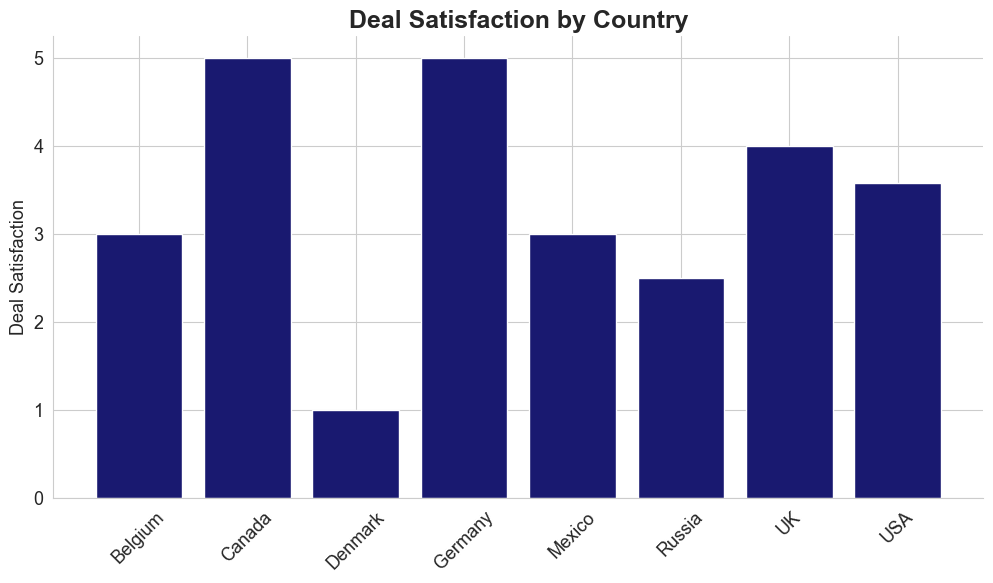

In [209]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.bar(x=averages_by_country.index,
        height=averages_by_country['deal_satisfaction'],
        color='midnightblue')
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.title("Deal Satisfaction by Country",fontsize=18,fontweight='bold')
plt.ylabel('Deal Satisfaction',fontsize=13)

sns.despine()
plt.show()

#### Age Distribution (Histogram)

In [211]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


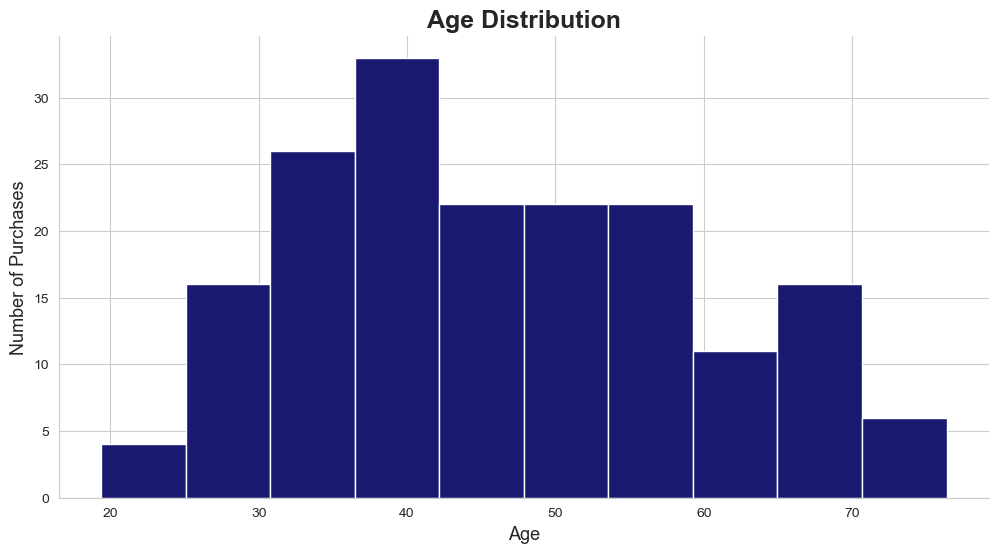

In [212]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.hist(data['age_at_purchase'],
         bins=10,
         color='midnightblue')
plt.title('Age Distribution',fontsize=18,fontweight='bold')
plt.xlabel('Age',fontsize=13)
plt.ylabel('Number of Purchases',fontsize=13)

sns.despine()
plt.show()

#### Segmentation by state (Pareto diagram)

In [214]:
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [215]:
# we need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

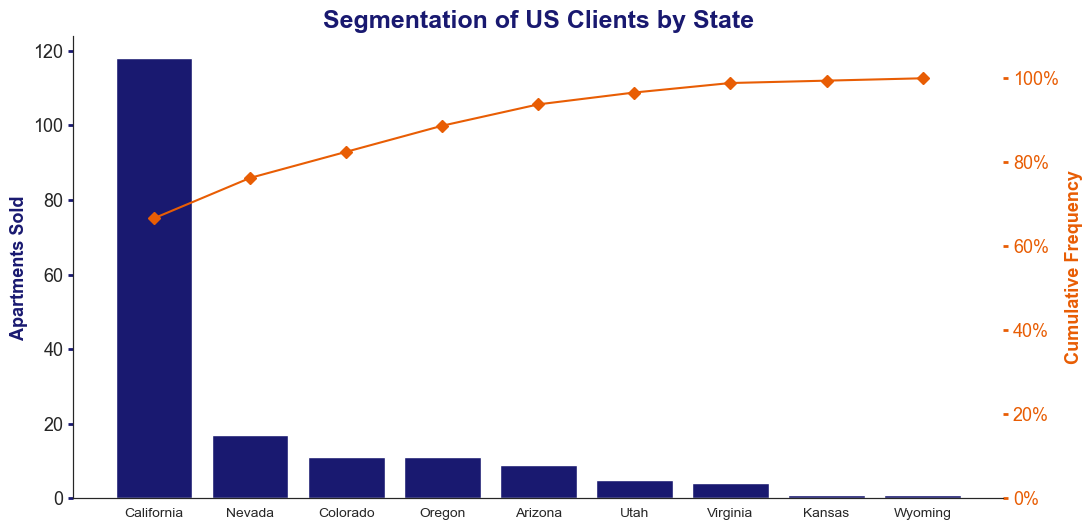

In [216]:
sns.set_style('white')

fig,ax = plt.subplots(figsize=(12,6))

# First part is to create a bar chart
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color='midnightblue')
ax.set_ylabel('Apartments Sold',
              weight='bold',
              fontsize=13,
              color='midnightblue')
ax.tick_params(axis="y",
               width=2,
               labelsize=13,
               color='midnightblue')

# Creating a second axis that shares the same x-axis as the first
ax2 = ax.twinx()

ax2.set_ylim(0,1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

# Second part is a line chart 
ax2.plot(sold_by_state.index,
         sold_by_state['cumulative_frequency'],
         color='#E85D04',
         marker='D')
ax2.set_ylabel('Cumulative Frequency',
               color='#E85D04',
               weight='bold',
               fontsize=13)
ax2.tick_params(axis="y",
                colors='#E85D04',
                width=2,
                labelsize=13)

ax.set_title('Segmentation of US Clients by State',fontsize=18,fontweight='bold',color='midnightblue')

sns.despine()
plt.show()

#### Total sales per year (Line chart)

In [218]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [219]:
data['date_sale'][0].year

2005

In [220]:
data['year_sale'] = data['date_sale'].apply(lambda x:x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [221]:
data['year_sale'] = data['year_sale'].fillna(0).astype(int)
data['year_sale'] = data['year_sale'].replace({0:pd.NA})

In [222]:
columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()/1000000

In [223]:
revenue_per_year.rename(columns={'price$':'revenue$'},inplace=True)

In [224]:
revenue_per_year

,revenue$
year_sale,
2004,4.397010
2005,7.215232
2006,10.906001
2007,27.451798
2008,2.212160
2010,0.357538


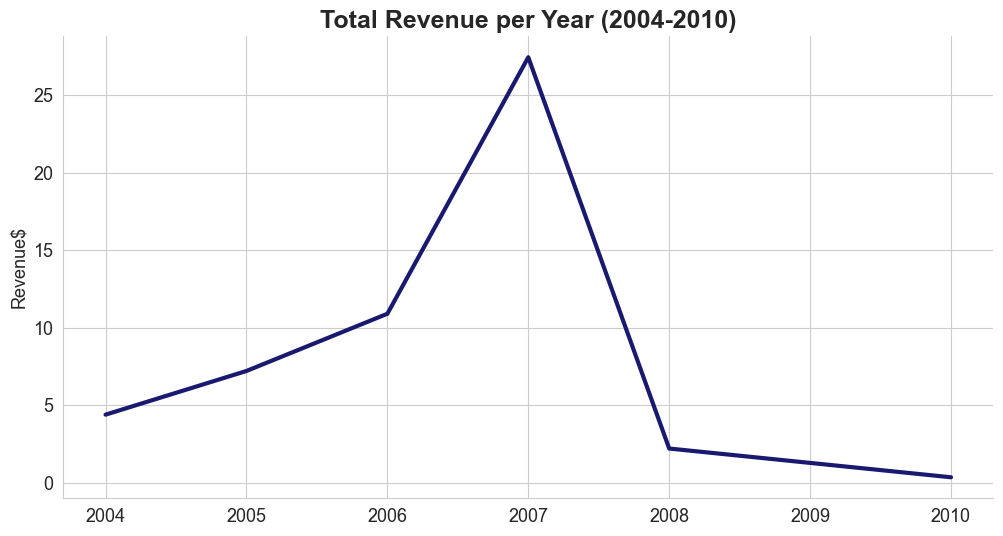

In [225]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.plot(revenue_per_year['revenue$'],
         color='midnightblue',
         linewidth=3)
plt.title('Total Revenue per Year (2004-2010)',fontsize=18,fontweight='bold')
plt.ylabel('Revenue$',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

sns.despine()
plt.show()

#### Yearly sales distribution across buildings (Stacked area chart)

1. Initialize a checkpoint dataframe
2. Formulate building indicators
3. Redefine column names
4. Exclude unsold properties
5. Generate a yearly breakdown
6. Creating stacked area chart

In [228]:
data_stacked_area = data.copy()

In [229]:
data_stacked_area

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",<NA>
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]",<NA>
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]",<NA>
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]",<NA>


In [230]:
building_dummies = pd.get_dummies(data_stacked_area['building'],dtype='int')
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [395]:
data_stacked_area = pd.concat([data_stacked_area,building_dummies],axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [397]:
data_stacked_area = data_stacked_area.rename(columns = {'1':'building1',
                                                        '2':'building2',
                                                        '3':'building3',
                                                        '4':'building4',
                                                        '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [399]:
data_stacked_area = data_stacked_area[data_stacked_area['sold']==1]

In [401]:
columns_of_intrest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_intrest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


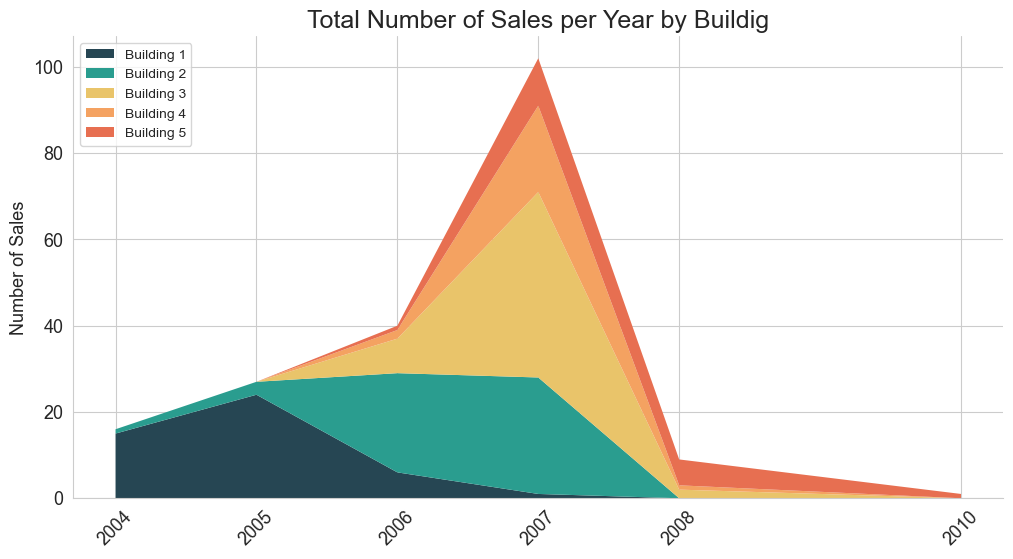

In [413]:
colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51']
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5']

sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.stackplot(stacked_area.index,
                stacked_area['building1'],
                stacked_area['building2'],
                stacked_area['building3'],
                stacked_area['building4'],
                stacked_area['building5'],
                colors=colors,
                edgecolor='none')
plt.xticks(stacked_area.index,rotation=45,fontsize=13)
plt.legend(labels=labels,loc='upper left')
plt.ylabel('Number of Sales',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Total Number of Sales per Year by Buildig', fontsize=18)

sns.despine()
plt.show()

### Data Interpretation

After preprocessing, analyzing, and visualizing data. We can draw following conclusions/insights

#### Customer Profile

Customer profile allow real estate owners and developers to look for the perfect buyers
- We can note that the age which most customers purchase a home is between 31 and 42 - more precisely, the 36-42 bracket, closely foloowed by 31 to 26

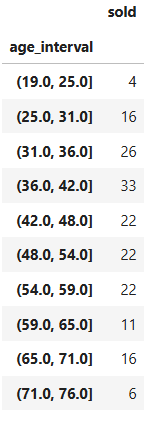

The statistical sample is only made up of about a hundred or so customers, so we’d need a wider data sample to make a more conclusive statement. Nonetheless, when equipped with enough information, the real estate firm can create an ideal buyer profile to discover customers whose characteristics align with those of their ideal persona. They can then target the specific cluster of people through ads on YouTube, Google, Facebook, or similar marketplaces.


#### Building Characteristics

##### Breakdown by Building

Based on our analysis, we conclude that the most sold buildings are types 2 and 3

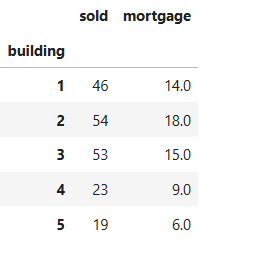

However, when we examine the average price and deal satisfaction, we motice something else

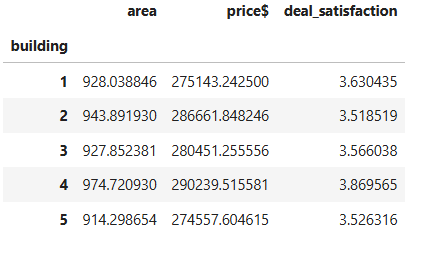

- Type 4 has the highest average property sale prices at 290,000USD. Types 2 and 3 are close behind. Going back to the buildings in type 4, we see that the average deal satisfaction is also highest-close to 3.9
- Type 4 is also the highest in terms of area
- It is likely that the buildings in type 4 have more luxurious or spacious apartments. The totals show that these kinds of properties don’t sell as often as others. They are also more expensive due to their size, as buildings are sold per square meter. Customers are more likely to buy smaller and less expensive building types, as indicated by the trends in our dataset.Real estate developers can consider this information when devising their strategies. One option is to rely on more standard building types, such as 2 and 3, and sell more buildings at a more average price. Alternatively, they can invest in a few more luxurious apartments and sell them at a higher price, thus creating a higher deal satisfaction.


##### Sales by Country

Looking at the geographical data, we notice that 90% of the sales come from the United States

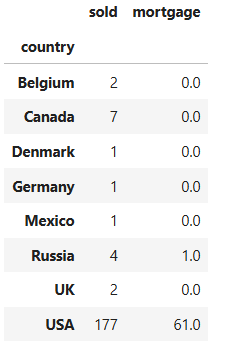

##### Total Number of Sales per Year by Building

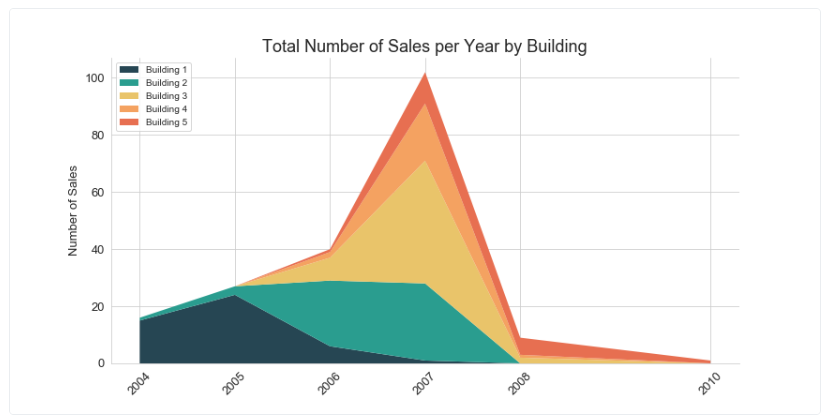

- We observe that 2007 is by far the most popular year for sales. Based on historical events, this comes as no surprise as it happened right before the market crash in the States